# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 2. Import Dataset

In [3]:
df = pd.read_csv('datasets/cleaned_dataset.csv')
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,B365H,B365D,B365A,Result,HDays,ADays,HASL5M,HASTL5M,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,HWinStreak,AASL5M,AASTL5M,AGDL5M,AGDL5AM,AAPL5M,AAPL5AM,AWinStreak,HDef,HMid,HAtt,ADef,AMid,AAtt
0,2012-08-18,arsenal,sunderland,0.0,0.0,14.0,3.0,4.0,2.0,1.40,4.5,8.5,D,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,82,84,74,75,78
1,2012-09-01,swansea,sunderland,2.0,2.0,14.0,4.0,10.0,3.0,2.20,3.3,3.4,D,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,73,73,73,74,75,77
2,2012-09-22,west-ham,sunderland,1.0,1.0,20.0,4.0,11.0,2.0,2.10,3.3,3.6,D,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71,73,75,74,75,77
3,2012-10-06,city,sunderland,3.0,0.0,26.0,8.0,16.0,6.0,1.29,5.5,11.0,W,1,1,16.0,10.0,3.0,NaN,1.8,NaN,1.0,5.6,3.4,1.0,NaN,1.4,NaN,1.0,81,83,85,74,75,77
4,2012-10-27,stoke,sunderland,0.0,0.0,11.0,6.0,6.0,3.0,1.95,3.3,4.2,D,0,0,8.0,4.6,-1.0,NaN,1.0,NaN,0.0,9.0,4.8,-2.0,NaN,1.2,NaN,0.0,75,76,75,74,75,77


In [4]:
# df['HRating'] = (df['HDef'] + df['HMid'] + df['HAtt'] ) / 3
# df['ARating'] = (df['ADef'] + df['AMid'] + df['AAtt'] ) / 3
# df.head()

In [5]:
df = df[['HDays', 'ADays',
         'HASL5M', 'HASTL5M',
         'HGDL5M', 'HGDL5HM', 'HAPL5M', 'HAPL5HM',
         'AASL5M', 'AASTL5M',
         'AGDL5M', 'AGDL5AM', 'AAPL5M','AAPL5AM', 
         'HDef', 'HMid', 'HAtt', 
         'ADef', 'AMid', 'AAtt',
         'B365H', 'B365D', 'B365A',
         'Result'
        ]]
df.head()

,HDays,ADays,HASL5M,HASTL5M,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,AASL5M,AASTL5M,AGDL5M,AGDL5AM,AAPL5M,AAPL5AM,HDef,HMid,HAtt,ADef,AMid,AAtt,B365H,B365D,B365A,Result
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,82,84,74,75,78,1.40,4.5,8.5,D
1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,73,73,74,75,77,2.20,3.3,3.4,D
2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,73,75,74,75,77,2.10,3.3,3.6,D
3,1,1,16.0,10.0,3.0,NaN,1.8,NaN,5.6,3.4,1.0,NaN,1.4,NaN,81,83,85,74,75,77,1.29,5.5,11.0,W
4,0,0,8.0,4.6,-1.0,NaN,1.0,NaN,9.0,4.8,-2.0,NaN,1.2,NaN,75,76,75,74,75,77,1.95,3.3,4.2,D


In [6]:
df.shape

(3800, 24)

In [164]:
df = df.dropna(axis=0).reset_index(drop=True)
df.head()

,HDays,ADays,HASL5M,HASTL5M,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,AASL5M,AASTL5M,AGDL5M,AGDL5AM,AAPL5M,AAPL5AM,HDef,HMid,HAtt,ADef,AMid,AAtt,B365H,B365D,B365A,Result
0,0,0,12.8,6.2,1.0,8.0,1.4,2.0,9.4,4.0,-5.0,-4.0,0.4,0.6,75,77,78,74,75,77,1.67,3.75,5.25,L
1,1,1,9.8,5.0,2.0,0.0,1.8,2.0,12.2,6.8,-2.0,-2.0,0.8,1.0,73,72,72,74,75,77,2.10,3.30,3.60,W
2,0,0,13.6,8.0,4.0,5.0,2.4,2.4,15.6,9.4,-2.0,-3.0,0.8,0.8,83,82,86,74,75,77,1.20,6.50,15.00,W
3,0,0,14.4,8.0,4.0,2.0,2.0,1.6,14.4,9.0,-2.0,-2.0,0.8,0.8,72,70,73,74,75,77,2.00,3.50,3.75,L
4,1,1,18.4,10.8,4.0,6.0,1.8,2.0,12.0,7.8,2.0,-1.0,1.8,1.2,79,80,79,74,75,77,1.40,4.50,8.50,W


In [165]:
df.shape

(3553, 24)

# 2. Model Building

## 2.1 Decision Tree Classifier

Highest Accuracy: 44.83 %

In [166]:
X = df.iloc[:, :-1].values
# X = df.iloc[:, :16].values
y = df.iloc[:, -1].values

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [168]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [170]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [171]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [172]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['W' 'W']
 ['W' 'W']
 ['D' 'W']
 ...
 ['W' 'W']
 ['L' 'W']
 ['D' 'W']]


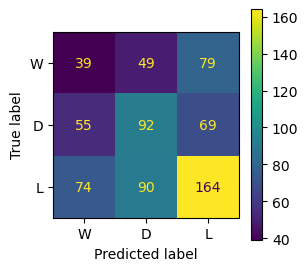

In [173]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['W', 'D', 'L'])
cmp.plot(ax=ax)

plt.show();

In [174]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 44.83 %


In [175]:
from sklearn.metrics import classification_report, accuracy_score

print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.4149085794655415

              precision    recall  f1-score   support

           D       0.23      0.23      0.23       167
           L       0.40      0.43      0.41       216
           W       0.53      0.50      0.51       328

    accuracy                           0.41       711
   macro avg       0.39      0.39      0.39       711
weighted avg       0.42      0.41      0.42       711



In [176]:
from sklearn.metrics import roc_auc_score

# Generate membership scores with .predict_proba
y_pred_probs = classifier.predict_proba(X_test)

# Calculate ROC_AUC
roc_auc_score(
    y_test, y_pred_probs, multi_class="ovr", average="weighted"
)

0.5478182948747187

## 2.2 SVM Classifier

Highest Accuracy: 54.99 %

In [177]:
X = df.iloc[:, :-1].values
# X = df.iloc[:, :16].values
y = df.iloc[:, -1].values

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [179]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [181]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [182]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
classifier.fit(X_train, y_train)

SVC(probability=True, random_state=0)

In [183]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['W' 'W']
 ['W' 'W']
 ['W' 'W']
 ...
 ['W' 'W']
 ['W' 'W']
 ['W' 'W']]


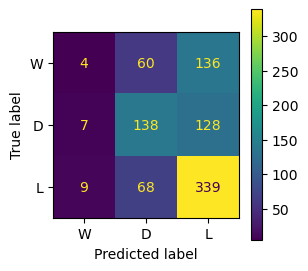

In [184]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['W', 'D', 'L'])
cmp.plot(ax=ax)

plt.show();

In [185]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 54.99 %


In [186]:
from sklearn.metrics import classification_report, accuracy_score

print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.5410573678290214

              precision    recall  f1-score   support

           D       0.20      0.02      0.04       200
           L       0.52      0.51      0.51       273
           W       0.56      0.81      0.67       416

    accuracy                           0.54       889
   macro avg       0.43      0.45      0.40       889
weighted avg       0.47      0.54      0.48       889



In [187]:
from sklearn.metrics import roc_auc_score

# Generate membership scores with .predict_proba
y_pred_probs = classifier.predict_proba(X_test)

# Calculate ROC_AUC
roc_auc_score(
    y_test, y_pred_probs, multi_class="ovr", average="weighted"
)

0.6433978372179219

## 2.3 Naive Bayes Classifier

Highest Accuracy: 55.63

In [188]:
X = df.iloc[:, :-1].values
# X = df.iloc[:, :16].values
y = df.iloc[:, -1].values

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [190]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [191]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [192]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [193]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['W' 'W']
 ['W' 'W']
 ['D' 'W']
 ...
 ['W' 'W']
 ['W' 'W']
 ['W' 'W']]


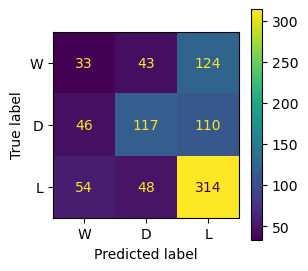

In [194]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['W', 'D', 'L'])
cmp.plot(ax=ax)

plt.show();

In [195]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 55.63 %


In [196]:
from sklearn.metrics import classification_report, accuracy_score

print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.5219347581552306

              precision    recall  f1-score   support

           D       0.25      0.17      0.20       200
           L       0.56      0.43      0.49       273
           W       0.57      0.75      0.65       416

    accuracy                           0.52       889
   macro avg       0.46      0.45      0.45       889
weighted avg       0.50      0.52      0.50       889



In [197]:
from sklearn.metrics import roc_auc_score

# Generate membership scores with .predict_proba
y_pred_probs = classifier.predict_proba(X_test)

# Calculate ROC_AUC
roc_auc_score(
    y_test, y_pred_probs, multi_class="ovr", average="weighted"
)

0.6751291641191524

## 2.4 KNN Classifier

Highest Accuracy: 47.71 %

In [198]:
X = df.iloc[:, :-1].values
# X = df.iloc[:, :16].values
y = df.iloc[:, -1].values

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [200]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [201]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [202]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [203]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['W' 'W']
 ['W' 'W']
 ['L' 'W']
 ...
 ['W' 'W']
 ['L' 'W']
 ['W' 'W']]


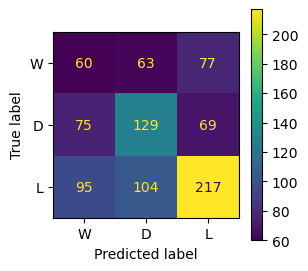

In [204]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['W', 'D', 'L'])
cmp.plot(ax=ax)

plt.show();

In [205]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 47.71 %


In [206]:
from sklearn.metrics import classification_report, accuracy_score

print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.4566929133858268

              precision    recall  f1-score   support

           D       0.26      0.30      0.28       200
           L       0.44      0.47      0.45       273
           W       0.60      0.52      0.56       416

    accuracy                           0.46       889
   macro avg       0.43      0.43      0.43       889
weighted avg       0.47      0.46      0.46       889



In [207]:
from sklearn.metrics import roc_auc_score

# Generate membership scores with .predict_proba
y_pred_probs = classifier.predict_proba(X_test)

# Calculate ROC_AUC
roc_auc_score(
    y_test, y_pred_probs, multi_class="ovr", average="weighted"
)

0.6183073643985213